In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, Aer
from qiskit.circuit.library import EfficientSU2
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
import numpy as np



In [13]:
num_qubits = 12
qc = QuantumCircuit(num_qubits)
j = 0
pi = np.pi
angles = np.array([0.5, 1, 1.5, 1, 1.5, 1, 0.5, 1, 1.5, 1, 0.5, 1]) * pi


for i in range(num_qubits):
    qc.ry(angles[i], i)

for qubit in range(num_qubits - 1):
    qc.cnot(qubit, qubit+1)

qc.draw()


┌─────────┐                                                        
 q_0: ┤ Ry(π/2) ├───■────────────────────────────────────────────────────
      └┬───────┬┘ ┌─┴─┐                                                  
 q_1: ─┤ Ry(π) ├──┤ X ├──■───────────────────────────────────────────────
      ┌┴───────┴─┐└───┘┌─┴─┐                                             
 q_2: ┤ Ry(3π/2) ├─────┤ X ├──■──────────────────────────────────────────
      └┬───────┬─┘     └───┘┌─┴─┐                                        
 q_3: ─┤ Ry(π) ├────────────┤ X ├──■─────────────────────────────────────
      ┌┴───────┴─┐          └───┘┌─┴─┐                                   
 q_4: ┤ Ry(3π/2) ├───────────────┤ X ├──■────────────────────────────────
      └┬───────┬─┘               └───┘┌─┴─┐                              
 q_5: ─┤ Ry(π) ├──────────────────────┤ X ├──■───────────────────────────
      ┌┴───────┴┐                     └───┘┌─┴─┐                         
 q_6: ┤ Ry(π/2) ├──────────────────────────┤ X ├──■──────────────────────
      └┬───────┬┘                          └───┘┌─┴─┐                    
 q_7: ─┤ Ry(π) ├────────────────────────────────┤ X ├──■─────────────────
      ┌┴───────┴─┐                              └───┘┌─┴─┐               
 q_8: ┤ Ry(3π/2) ├───────────────────────────────────┤ X ├──■────────────
      └┬───────┬─┘                                   └───┘┌─┴─┐          
 q_9: ─┤ Ry(π) ├──────────────────────────────────────────┤ X ├──■───────
      ┌┴───────┴┐                                         └───┘┌─┴─┐     
q_10: ┤ Ry(π/2) ├──────────────────────────────────────────────┤ X ├──■──
      └┬───────┬┘                                              └───┘┌─┴─┐
q_11: ─┤ Ry(π) ├────────────────────────────────────────────────────┤ X ├
       └───────┘                                                    └───┘

In [14]:
from qiskit import BasicAer, transpile
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(qc, backend)).result()
psi  = result.get_statevector(qc)




In [22]:
np.linalg.norm(psi.real)
for coso in psi:
    if coso.real > 0:
        print(coso.real)

0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003
0.12500000000000003


KeyboardInterrupt: 

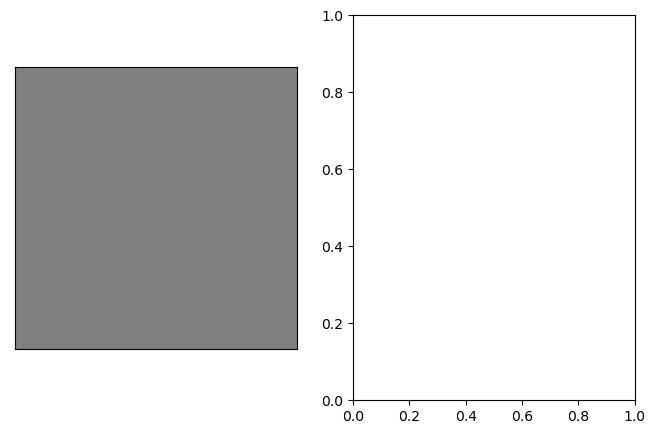

In [18]:
plot_state_hinton(psi)


In [32]:
plot_state_qsphere(psi)

KeyboardInterrupt: 

In [24]:
# plot_state_paulivec(psi)
#

np.where(abs(psi) > 0 )

(array([1365, 1366, 1369, 1370, 1381, 1382, 1385, 1386, 1429, 1430, 1433,
        1434, 1445, 1446, 1449, 1450, 1621, 1622, 1625, 1626, 1637, 1638,
        1641, 1642, 1685, 1686, 1689, 1690, 1701, 1702, 1705, 1706, 2389,
        2390, 2393, 2394, 2405, 2406, 2409, 2410, 2453, 2454, 2457, 2458,
        2469, 2470, 2473, 2474, 2645, 2646, 2649, 2650, 2661, 2662, 2665,
        2666, 2709, 2710, 2713, 2714, 2725, 2726, 2729, 2730], dtype=int64),)

In [31]:
[bin(int(l)) for l in np.where(abs(psi) > 0)[0]]

['0b10101010101',
 '0b10101010110',
 '0b10101011001',
 '0b10101011010',
 '0b10101100101',
 '0b10101100110',
 '0b10101101001',
 '0b10101101010',
 '0b10110010101',
 '0b10110010110',
 '0b10110011001',
 '0b10110011010',
 '0b10110100101',
 '0b10110100110',
 '0b10110101001',
 '0b10110101010',
 '0b11001010101',
 '0b11001010110',
 '0b11001011001',
 '0b11001011010',
 '0b11001100101',
 '0b11001100110',
 '0b11001101001',
 '0b11001101010',
 '0b11010010101',
 '0b11010010110',
 '0b11010011001',
 '0b11010011010',
 '0b11010100101',
 '0b11010100110',
 '0b11010101001',
 '0b11010101010',
 '0b100101010101',
 '0b100101010110',
 '0b100101011001',
 '0b100101011010',
 '0b100101100101',
 '0b100101100110',
 '0b100101101001',
 '0b100101101010',
 '0b100110010101',
 '0b100110010110',
 '0b100110011001',
 '0b100110011010',
 '0b100110100101',
 '0b100110100110',
 '0b100110101001',
 '0b100110101010',
 '0b101001010101',
 '0b101001010110',
 '0b101001011001',
 '0b101001011010',
 '0b101001100101',
 '0b101001100110',
 '0b10

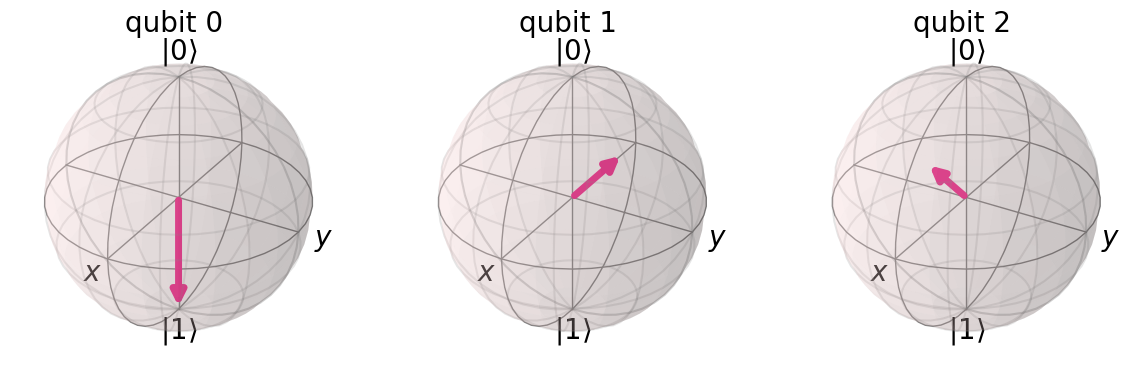

In [32]:
plot_bloch_multivector(psi)

In [33]:
circuit = qc


# Use Aer's qasm_simulator
simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000000)
result = job.result()

counts = result.get_counts(compiled_circuit)

plot_histogram(counts)

QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000002A2F9587DC0>"'

In [18]:
import numpy as np
params = (np.array([ 3.11317963e+00,  4.13115199e+00,  4.29674847e-01, -1.52975630e+00,
        2.60415695e-01,  1.98079378e-01, -1.40842930e-01,  2.80300516e-01,
        2.95056543e-01,  2.43323580e-02, -4.08504070e-02,  5.11327297e-01,
       -2.02439945e-02,  4.58544776e-01,  5.70987146e-01, -1.12254762e-02,
        2.07061049e-01,  4.54376095e-01, -2.00549924e+00,  4.13272186e-01,
       -8.24440050e-02,  2.97016728e-01, -2.86139650e-02, -1.43951822e-01,
        1.55875114e+00,  8.33615771e-01, -1.45146699e+00,  2.21693445e-01,
        3.27873071e-01,  3.03459707e-01, -3.32164149e-03, -4.58021052e-01,
        6.69112706e-03,  3.41647268e-01,  1.59543434e-01, -1.62087871e-01]) / np.pi)
(params*100).round() / 100

array([ 0.99,  1.31,  0.14, -0.49,  0.08,  0.06, -0.04,  0.09,  0.09,
        0.01, -0.01,  0.16, -0.01,  0.15,  0.18, -0.  ,  0.07,  0.14,
       -0.64,  0.13, -0.03,  0.09, -0.01, -0.05,  0.5 ,  0.27, -0.46,
        0.07,  0.1 ,  0.1 , -0.  , -0.15,  0.  ,  0.11,  0.05, -0.05])

In [4]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter

def create_ansatz_1(num_qubits, layers = 1):
    qc = QuantumCircuit(num_qubits)

    for qubit in range(0, num_qubits - (num_qubits % 2), 2):
        qc.h(qubit)
        qc.cnot(qubit, qubit+1)

    j = 0
    for layer in range(layers):
        for qubit in range(num_qubits):
            qc.ry(Parameter('θ_' + str(j)), qubit)
            j += 1
        for qubit in range(num_qubits - 1):
            qc.cnot(qubit, qubit+1)
    return qc

def create_ansatz_2(num_qubits, layers = 1):
    qc = QuantumCircuit(num_qubits)
    j = 0
    for qubit in range(num_qubits):
            qc.ry(Parameter('θ_' + str(j)), qubit)
            j += 1
    for layer in range(layers):
        for qubit in range(num_qubits - 1):
            qc.cnot(qubit, qubit+1)
        for qubit in range(num_qubits):
            qc.ry(Parameter('θ_' + str(j)), qubit)
            j += 1
       
    return qc

def create_ansatz_3(num_qubits, layers = 1):
    qc = QuantumCircuit(num_qubits)
    j = 0
    for qubit in range(num_qubits):
            qc.ry(Parameter('θ_' + str(j)), qubit)
            j += 1
    for layer in range(layers):
        for qubit in range(0, (num_qubits % 2), 2):
            qc.h(qubit)
            qc.cnot(qubit, qubit+1)
        for qubit in range(num_qubits):
            qc.ry(Parameter('θ_' + str(j)), qubit)
            j += 1
       
    return qc

# ANSATZ 4 ES EL QUE ESTAMOS USANDO EN EL PRIMER CASO
# RY CX
def create_ansatz_4(num_qubits, layers = 1):
    qc = QuantumCircuit(num_qubits)
    j = 0
    for layer in range(layers):
        for qubit in range(num_qubits):
            qc.ry(Parameter('θ_' + str(j)), qubit)
            j += 1
        for qubit in range(num_qubits -1):
            qc.cnot(qubit, qubit+1)
        
    return qc

# Controlled RY
num_qubits = 3
layers = 2

def create_ansatz_cry(num_qubits, layers = 1):
    qc = QuantumCircuit(num_qubits)
    j = 0
    for layer in range(layers):
        qc.ry(Parameter('θ_' + str(j)), 0)
        j += 1

        for qubit in range(1, num_qubits):
            qc.cry(Parameter('θ_' + str(j)), qubit - 1, qubit)
            j += 1
    return qc

qc = QuantumCircuit(num_qubits)
j = 0
for layer in range(layers):
    qc.ry(Parameter('θ_' + str(j)), 0)
    j += 1

    for qubit in range(1, num_qubits):
        qc.cry(Parameter('θ_' + str(j)), qubit - 1, qubit)
        qc.cnot(qubit, qubit -1)
        j += 1

# qc = create_ansatz_cry(num_qubits)
qc.draw()



┌─────────┐           ┌───┐┌─────────┐                ┌───┐           »
q_0: ┤ Ry(θ_0) ├─────■─────┤ X ├┤ Ry(θ_3) ├──────────■─────┤ X ├───────────»
     └─────────┘┌────┴────┐└─┬─┘└─────────┘┌───┐┌────┴────┐└─┬─┘           »
q_1: ───────────┤ Ry(θ_1) ├──■───────■─────┤ X ├┤ Ry(θ_4) ├──■───────■─────»
                └─────────┘     ┌────┴────┐└─┬─┘└─────────┘     ┌────┴────┐»
q_2: ───────────────────────────┤ Ry(θ_2) ├──■──────────────────┤ Ry(θ_5) ├»
                                └─────────┘                     └─────────┘»
«          
«q_0: ─────
«     ┌───┐
«q_1: ┤ X ├
«     └─┬─┘
«q_2: ──■──
«

In [4]:
import numpy as np
X = np.matrix([[0, 1],[1, 0]])
np.sqrt(X)

[[0. 1.]
 [1. 0.]]
